# San Francisco Housing Cost Analysis

In [100]:
#This is a script to do the following:
# 1. In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.
# 2. 
# 3. 
# 4.


In [101]:
#Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [102]:
#Load the .env variable with the Mapbox API key, and then verify the API was pulled successfully
load_dotenv("MY_KEYS.env")
map_box_api = os.getenv("mapbox")
type(map_box_api)

str

## Load Data

In [103]:
#Read the San Francisco census data into a dataframe from the csv file and preview it
file_path = Path("Raw_Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

The average number of housing units per year is calculated and plotted as a bar chart using Pandas.

In [104]:
#Calculate the mean number of housing units per year and save in a new dataframe
sfo_mean_housing_units = sfo_data.groupby(sfo_data.index)["housing_units"].mean()
sfo_mean_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [105]:
#Save the dataframe with the mean housing units as a csv file
sfo_mean_housing_units.to_csv(path_or_buf='Output_csv_data_files/sfo_mean_housing_units')

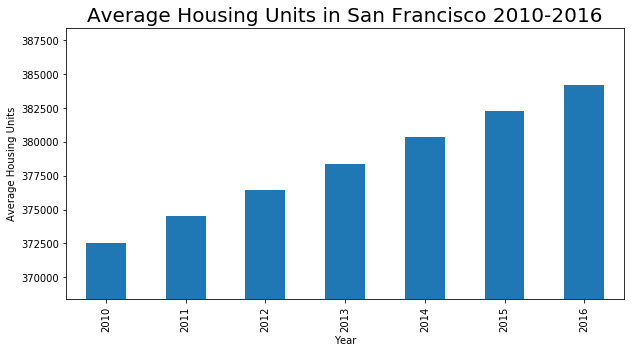

In [106]:
#Plot the average housing units per year for San Francisco
#To better display the data, use the minimum, maximum, and standard deviations of the data to calculate a better y-axis range
minimum_mean_units = sfo_mean_housing_units.min()
maximum_mean_units = sfo_mean_housing_units.max()
std_mean_units = sfo_mean_housing_units.std()

sfo_mean_housing_units.plot(
    kind='bar', 
    ylim=(minimum_mean_units - std_mean_units,maximum_mean_units + std_mean_units), 
    xlabel="Year", 
    ylabel="Average Housing Units", 
    title="Average Housing Units in San Francisco 2010-2016", 
    figsize=(10,5)).title.set_size(20)

- - - 

## Average Housing Costs in San Francisco Per Year

An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. In this section, the average monthly rent and the average price per square foot for each year is calculated and plotted.

In [107]:
#Calculate the average sale price per square foot and average gross rent, and save in a new dataframe
sfo_mean_price_rent = sfo_data.groupby(sfo_data.index)[["sale_price_sqr_foot","gross_rent"]].mean()
sfo_mean_price_rent.columns = ["avg_sale_price_sqr_foot","avg_gross_rent"]
sfo_mean_price_rent

,avg_sale_price_sqr_foot,avg_gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


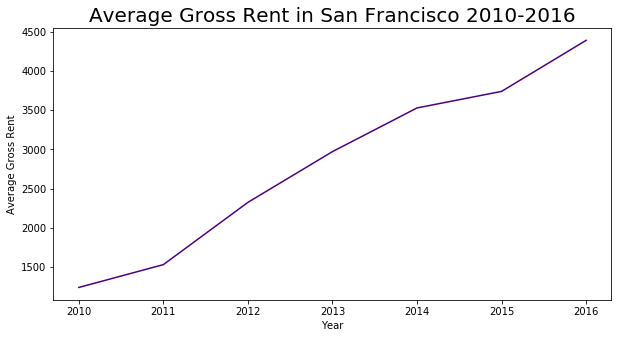

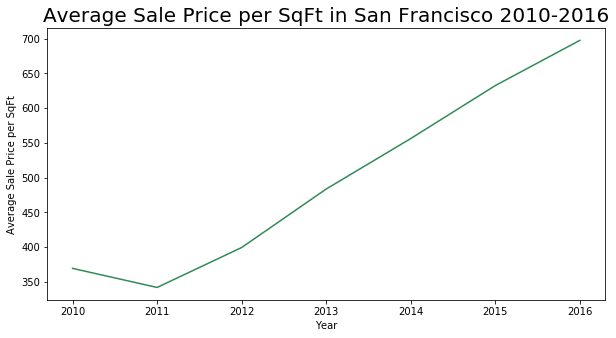

In [109]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
mean_rent_plot = sfo_mean_price_rent["avg_gross_rent"].plot(
    xlabel="Year", 
    ylabel="Average Gross Rent", 
    title="Average Gross Rent in San Francisco 2010-2016",
    color="indigo",
    figsize=(10,5)).title.set_size(20)
plt.show()

mean_price_plot = sfo_mean_price_rent["avg_sale_price_sqr_foot"].plot(
    xlabel="Year", 
    ylabel="Average Sale Price per SqFt", 
    title="Average Sale Price per SqFt in San Francisco 2010-2016",
    color="seagreen",
    figsize=(10,5)).title.set_size(20)
plt.show()

- - - 

## Average Prices by Neighborhood

In this section, two interactive plots of the average price per square foot and gross rent over time were created. Each plot has a dropdown selector widget for the neighborhood. 

In [161]:
#Trim the original dataframe of unnecessary columns, group the data by year and neighborhood, and then create a new dataframe of the grouped years and neighborhoods to show average sale price per sqft and average gross rent.
sfo_price_by_neighborhood = sfo_data.groupby([sfo_data.index,"neighborhood"])[["sale_price_sqr_foot","gross_rent","housing_units"]].mean()
sfo_price_by_neighborhood.columns = ["avg_sale_price_sqr_foot","avg_gross_rent","avg_housing_units"]
sfo_price_by_neighborhood

avg_sale_price_sqr_foot  avg_gross_rent  \
year neighborhood                                                      
2010 Alamo Square                         291.182945            1239   
     Anza Vista                           267.932583            1239   
     Bayview                              170.098665            1239   
     Buena Vista Park                     347.394919            1239   
     Central Richmond                     319.027623            1239   
...                                              ...             ...   
2016 Telegraph Hill                       903.049771            4390   
     Twin Peaks                           970.085470            4390   
     Van Ness/ Civic Center               552.602567            4390   
     Visitacion Valley                    328.319007            4390   
     Westwood Park                        631.195426            4390   

                             avg_housing_units  
year neighborhood                               
2010 Alamo Square                       372560  
     Anza Vista                         372560  
     Bayview                            372560  
     Buena Vista Park                   372560  
     Central Richmond                   372560  
...                                        ...  
2016 Telegraph Hill                     384242  
     Twin Peaks                         384242  
     Van Ness/ Civic Center             384242  
     Visitacion Valley                  384242  
     Westwood Park                      384242  

[397 rows x 3 columns]

In [162]:
#Plot the data using hvplot to show the average price per sqft over the years by neighborhood, with a dropdown widget to select the different neighborhoods.
sfo_price_by_neighborhood.hvplot(
    y="avg_sale_price_sqr_foot", 
    x="year", 
    groupby="neighborhood", 
    ylabel="Average Sale Price per SqFt", 
    xlabel="Year")

:DynamicMap   [neighborhood]
   :Curve   [year]   (avg_sale_price_sqr_foot)

In [163]:
#Plot the data using hvplot to show the average gross rent over the years by neighborhood, with a dropdown widget to select the different neighborhoods.
sfo_price_by_neighborhood.hvplot(
    y="avg_gross_rent", 
    x="year", 
    groupby="neighborhood", 
    ylabel="Average Gross Rent", 
    xlabel="Year")

:DynamicMap   [neighborhood]
   :Curve   [year]   (avg_gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, the mean sale price per square foot for each neighborhood is calculated to determine the top 10 most expensive neighborhoods on average.

In [164]:
#Group the data in the original dataframe by neighborhood, and then create a new dataframe of the grouped neighborhoods to show average sale price per sqft, average housing units, and average gross rent.
#Sort the values for average sale price per sqft in ascending order, reset the index, and remove all other entries from the dataframe besides the top 10 most expensive neighborhoods.
sfo_expensive_neighborhoods = sfo_data.groupby("neighborhood")[["sale_price_sqr_foot","housing_units","gross_rent"]].mean().sort_values("sale_price_sqr_foot", ascending=False).reset_index()
sfo_expensive_neighborhoods.columns = ["neighborhood","avg_sale_price_sqr_foot","avg_housing_units","avg_gross_rent"]
sfo_expensive_neighborhoods = sfo_expensive_neighborhoods.iloc[0:10]
sfo_expensive_neighborhoods

,neighborhood,avg_sale_price_sqr_foot,avg_housing_units,avg_gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [165]:
#Plot the price data from the top 10 most expensive neighborhoods
sfo_expensive_neighborhoods.hvplot.bar(
    title="Top 10 Most Expensive Neighborhoods in San Francisco", 
    y="avg_sale_price_sqr_foot",
    x="neighborhood", 
    ylabel="Average Sale Price per SqFt", 
    xlabel="Neighborhood",
    rot=90,
    frame_width=750,
    frame_height=250,
    color="orangered")

:Bars   [neighborhood]   (avg_sale_price_sqr_foot)

- - - 

## Comparison of cost to purchase versus rental income

In this section, a plot comparing the average cost to purchase versus average rental income over the years is created with a dropdown selector widget for each neighborhood.

In [167]:
#Retrieve the previous grouped dataframe used to evaluate average prices per neighborhood. 
sfo_price_by_neighborhood.reset_index(inplace=True)
sfo_price_by_neighborhood

,index,year,neighborhood,avg_sale_price_sqr_foot,avg_gross_rent,avg_housing_units
0,0,2010,Alamo Square,291.182945,1239,372560
1,1,2010,Anza Vista,267.932583,1239,372560
2,2,2010,Bayview,170.098665,1239,372560
3,3,2010,Buena Vista Park,347.394919,1239,372560
4,4,2010,Central Richmond,319.027623,1239,372560
...,...,...,...,...,...,...
392,392,2016,Telegraph Hill,903.049771,4390,384242
393,393,2016,Twin Peaks,970.085470,4390,384242
394,394,2016,Van Ness/ Civic Center,552.602567,4390,384242
395,395,2016,Visitacion Valley,328.319007,4390,384242


In [183]:
#Create a comparison plot of average price per sqft and average gross rent over the years, with a selector widget to pick a neighborhood.
sfo_price_by_neighborhood.hvplot.bar(
    title="Average Purchase Price per SqFt vs. Average Gross Rent by Year", 
    y=["avg_gross_rent","avg_sale_price_sqr_foot"],
    x="year",
    groupby="neighborhood",
    ylabel="Average Gross Rent/Average Sale Price per SqFt",
    xlabel="Year",
    rot=90,
    frame_width=750,
    frame_height=250,
    cmap=["darkblue","darkred"])

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

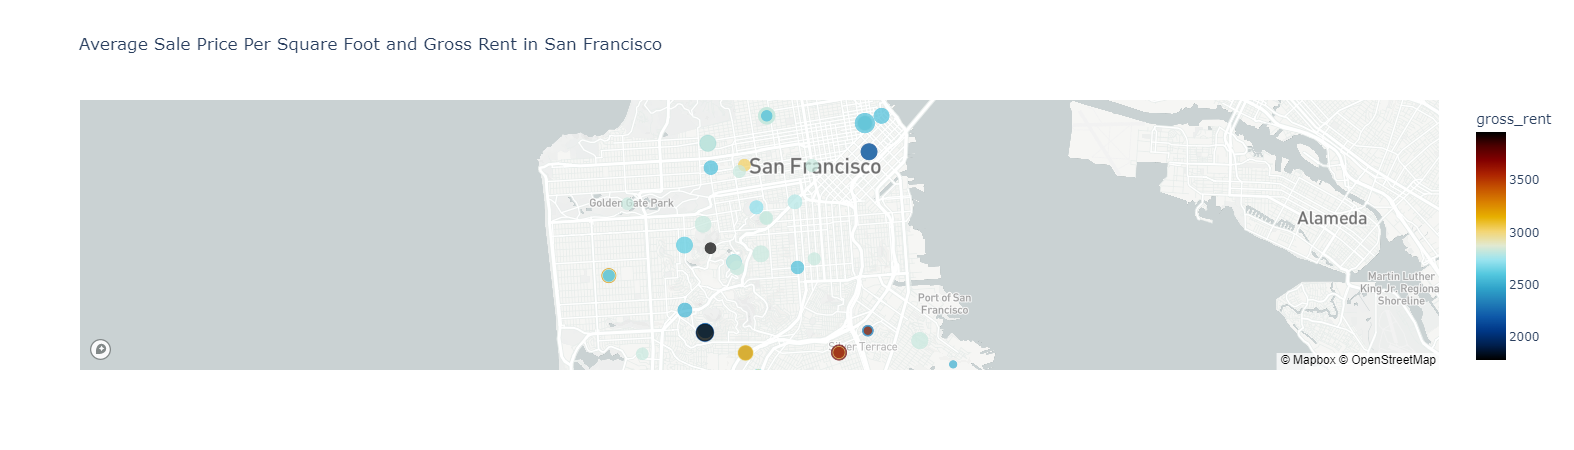

In [19]:
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


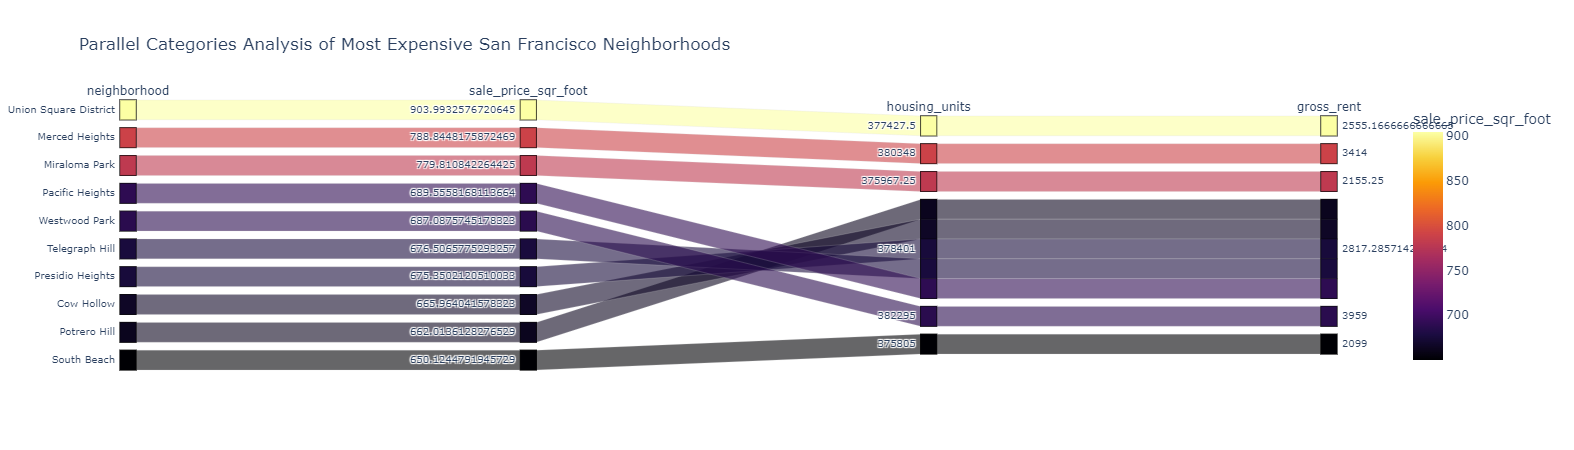

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

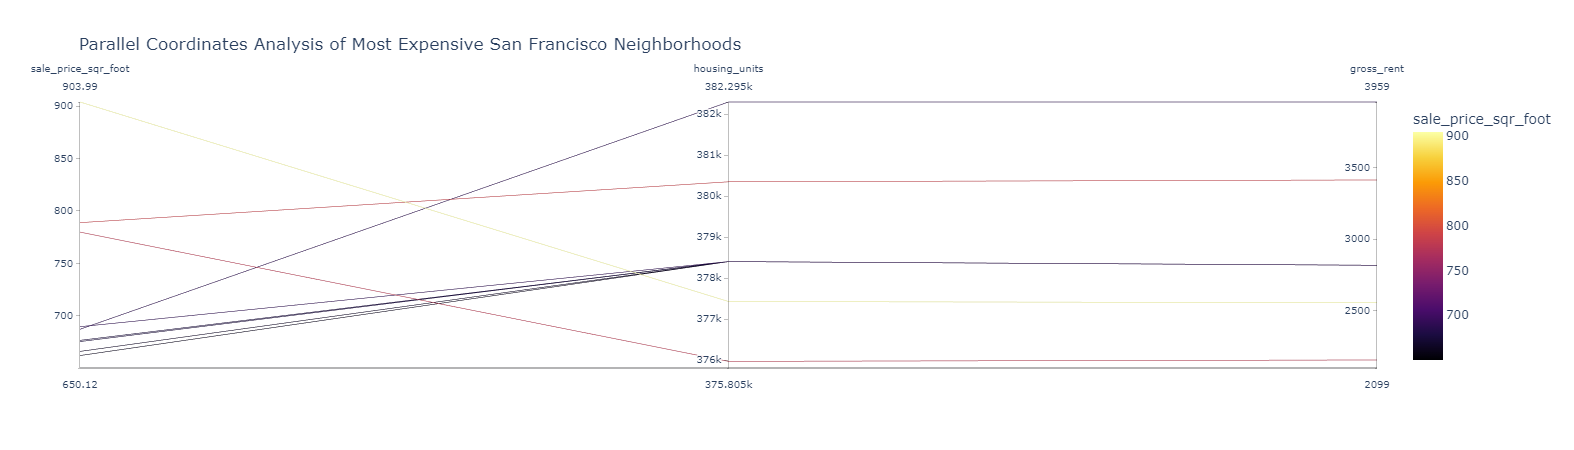

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

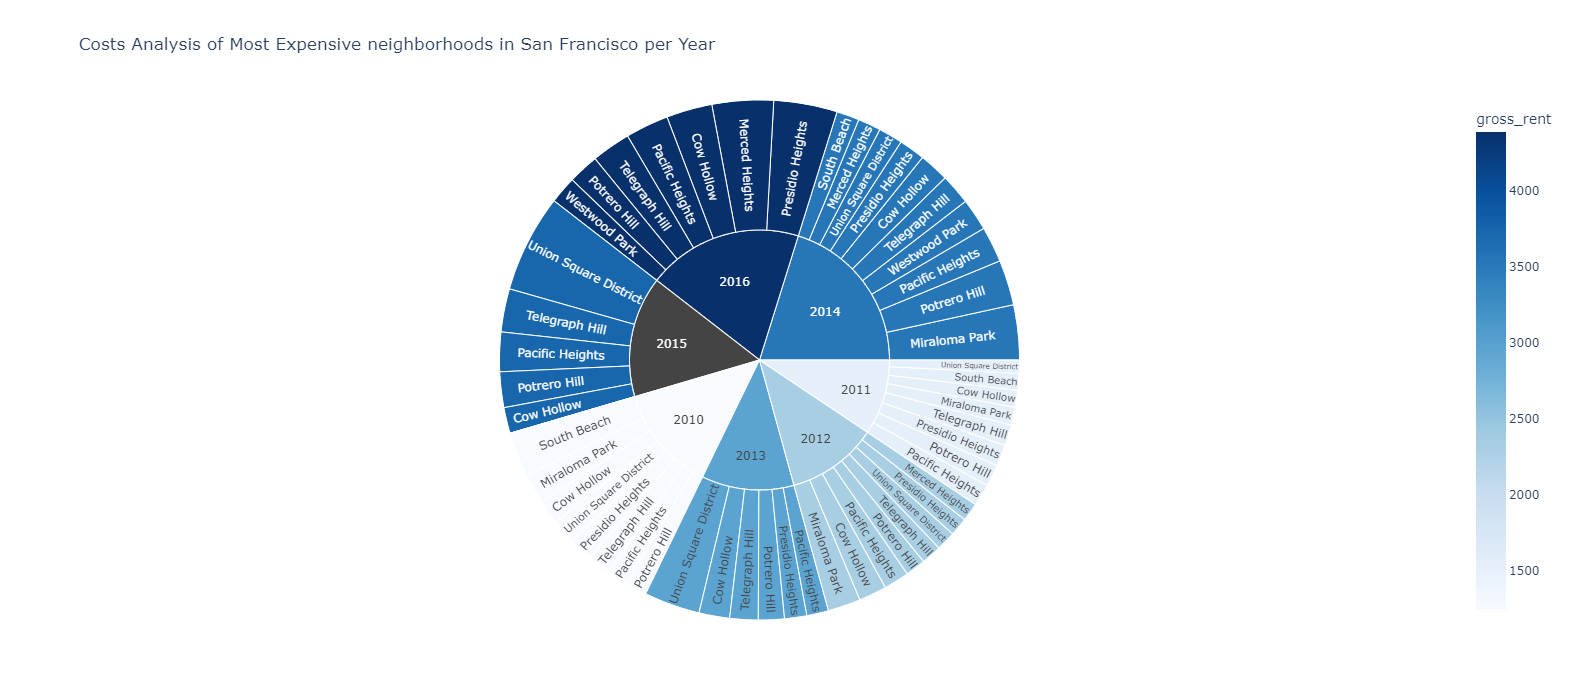

In [23]:
# Sunburst Plot
# YOUR CODE HERE!